In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv("lab4.csv", header=None)
df

,0,1,2,3,4,5,6
0,1,5.84,4.97,5.83,6.66,7.98,8.31
1,1,4.63,5.20,6.23,6.82,7.68,8.76
2,1,4.38,4.57,6.31,6.79,7.45,8.78
3,2,3.58,3.70,4.58,4.68,5.56,6.65
4,2,3.35,3.70,4.48,4.85,6.20,6.48
5,2,3.38,3.90,4.36,5.20,5.69,6.28
6,3,3.01,3.52,3.56,4.20,5.33,5.51
7,3,2.75,3.28,3.74,4.18,5.21,5.32
8,3,2.85,3.20,4.19,4.45,5.23,5.55
9,4,2.41,2.76,3.14,3.64,4.28,4.53


In [3]:
h = 0.7
dh = 0.0005
d = 0.046
dd = 0.0005
m = 0.22
dm = 0.0005
m0 = 0.047
dm0 = 0.0005
g = 9.8
l1 = 0.057
l0 = 0.025
b = 0.040

In [4]:
x = {e: [] for e in range(1, 7)}
y = {e: [] for e in range(1, 7)}
c = 0
for e in range(1, 5):
    for j in range(1, 7):
        t_mean = np.round(df[df[0] == e][j].mean(), 2)
        a = round(2 * h / t_mean ** 2, 3)
        epsilon = round(2 * a / d, 2)
        M = round((m0 + e * m) * d * (g - a) / 2, 3)
        x[j].append(epsilon)
        y[j].append(M)
        # print(f"{t_mean:.2f}")
        print(f"{t_mean:.2f}\t{a:.3f}\t{epsilon:.2f}\t{M:.3f}")
        # if c < 5:
        #     print(f"{M:.3f}", end="\t")
        # else:
        #     print(f"{M:.3f}")
        # c = (c + 1) % 6

4.95	0.057	2.48	0.060
4.91	0.058	2.52	0.060
6.12	0.037	1.61	0.060
6.76	0.031	1.35	0.060
7.70	0.024	1.04	0.060
8.62	0.019	0.83	0.060
3.44	0.118	5.13	0.108
3.77	0.099	4.30	0.109
4.47	0.070	3.04	0.109
4.91	0.058	2.52	0.109
5.82	0.041	1.78	0.109
6.47	0.033	1.43	0.109
2.87	0.170	7.39	0.157
3.33	0.126	5.48	0.157
3.83	0.095	4.13	0.158
4.28	0.076	3.30	0.158
5.26	0.051	2.22	0.159
5.46	0.047	2.04	0.159
2.39	0.245	10.65	0.204
2.78	0.181	7.87	0.205
3.14	0.142	6.17	0.206
3.62	0.107	4.65	0.207
4.44	0.071	3.09	0.207
4.85	0.060	2.61	0.208


Text(0, 0.5, 'M, $H\\cdot M$')

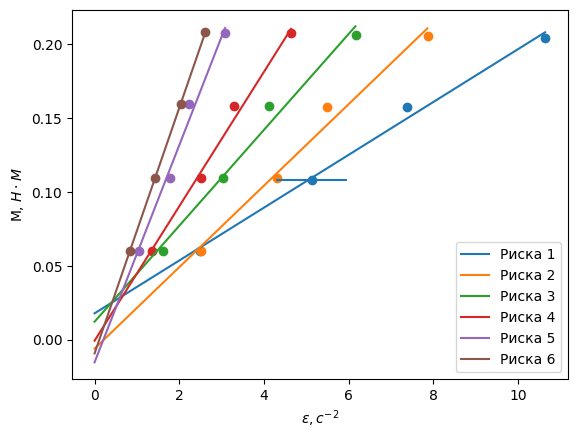

In [5]:
Is = []
for e in range(1, 7):
    if e != 1:
        plt.scatter(x[e], y[e])
    else:
        plt.scatter(x[e], y[e])
        plt.errorbar(x[e], y[e], [0] + [0.001] + [0] * (len(y[e]) - 2), [0] + [0.836] + [0] * (len(x[e]) - 2),
                     fmt="none")
    I, M_fr, *_ = scipy.stats.linregress(x[e], y[e])
    Is.append(I)
    x1 = np.arange(0, x[e][-1], 0.01)
    plt.plot(x1, x1 * I + M_fr, label=f"Риска {e}")
plt.legend()
plt.xlabel(r"$\varepsilon, с^{-2}$")
plt.ylabel(r"M, $H\cdot M$")

In [6]:
Is

[0.01786326275235954,
 0.02755161675377761,
 0.032428415152642914,
 0.045448387264863735,
 0.07339796346959393,
 0.08301162117510838]

0.4906057653784406 0.004850300672683369


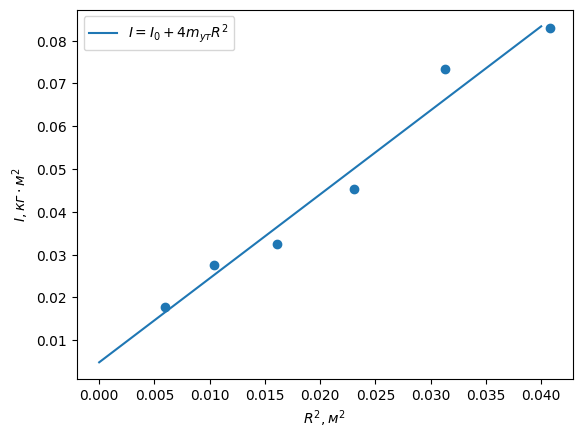

In [7]:
R_sq_s = []
TABLE = []
for e in range(1, 7):
    R = l1 + (e - 1) * l0 + b / 2
    R_sq_s.append(R ** 2)
    TABLE.append((R, R**2))
plt.scatter(R_sq_s, Is)
m_ut_4, I0, *_ = scipy.stats.linregress(R_sq_s, Is)
x1 = np.arange(0, R_sq_s[-1], 0.01)
plt.plot(x1, m_ut_4 * x1 + I0, label=r"$I=I_0+4m_{ут}R^2$")
plt.xlabel(r"$R^2, м^2$")
plt.ylabel(r"$I, кг\cdot м^2$")
plt.legend()
print(m_ut_4 / 4, I0)
m_ut = m_ut_4 / 4

In [8]:
RT, R2T, IT = np.column_stack((TABLE, Is)).T
print("\t".join([f"{round(x, 3):.3f}" for x in RT]))
print("\t".join([f"{round(x, 6):.6f}" for x in R2T]))
print("\t".join([f"{round(x, 3):.3f}" for x in IT]))

0.077	0.102	0.127	0.152	0.177	0.202
0.005929	0.010404	0.016129	0.023104	0.031329	0.040804
0.018	0.028	0.032	0.045	0.073	0.083


In [9]:
sample = df[df[0] == 2][1]
t_mean = sample.mean()
sigma_t = (sum((sample - t_mean) ** 2) / 3 / 2) ** 0.5
student_coef = 4.3
trust_interval = student_coef * sigma_t
t_inst_err = 0.005
t_abs_err = round((trust_interval ** 2 + (2 / 3 * t_inst_err) ** 2) ** 0.5, 1)
sigma_t, trust_interval, t_abs_err, t_mean

(0.07218802609235907, 0.310408512197144, 0.3, 3.436666666666666)

In [10]:
e = 2
a = round(2 * h / t_mean ** 2, 3)
epsilon = round(2 * a / d, 3)
M = round((m0 + e * m) * d * (g - a) / 2, 3)
a, epsilon, M

(0.119, 5.174, 0.108)

In [11]:
a_err = ((-4 * h * t_abs_err / t_mean ** 3) ** 2 + (2 * (2 / 3 * dh) / t_mean ** 2)) ** 0.5
epsilon_err = ((2 * a_err / d) ** 2 + (-2 * a / d ** 2 * (2 / 3 * dd))) ** 0.5
M_err = (((m0 + e * m) * d * (g - a) / 2 * (2 / 3 * ((e + 1) * dm))) ** 2 + ((m0 + e * m) * (g - a) / 2 * (2 / 3 * dd)) ** 2 + (- (m0 + e * m) * d / 2 * a_err) ** 2) ** 0.5

In [12]:
a, a_err, round(a_err, 3)

(0.119, 0.022016637449904397, 0.022)

In [13]:
epsilon, epsilon_err, round(epsilon_err, 1)

(5.174, 0.9374572365971646, 0.9)

In [14]:
M, M_err, round(M_err, 3)

(0.108, 0.0008306718987048692, 0.001)

In [15]:
x = np.array(R_sq_s)
y = np.array(Is)

In [16]:
x_mean = x.mean()
y_mean = y.mean()

In [17]:
b = sum((x - x_mean) * (y - y_mean)) / sum((x - x_mean) ** 2)
a = y_mean - x_mean * b
(a, b)

(0.004850300672683369, 1.9624230615137623)

In [18]:
d = y - (a + b * x)
D = sum((x - x_mean) ** 2)
S_b = (1 / D * sum(d ** 2) / 1) ** 0.5
S_a = ((1 / 3 + x_mean ** 2 / D) * sum(d ** 2) / 1) * 0.5
a_err = 2 * S_a
b_err = 2 * S_b

In [19]:
I0_err = a_err
round(I0, 5), I0_err, round(I0_err, 5)

(0.00485, 8.546885331411329e-05, 9e-05)

In [20]:
m_ut_err = b_err / 4
m_ut, m_ut_err, round(m_ut_err, 2)

(0.4906057653784406, 0.16973852089671135, 0.17)